# Dimension Reduction

**Reference**
- https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca
- https://sebastianraschka.com/faq/docs/lda-vs-pca.html
- https://en.wikipedia.org/wiki/Linear_discriminant_analysis

After data preprocessing and feature selection, we have generated a good feature subset. But sometimes, this subset might still contain too many features and cost so much computing power to train. In this case, we can use dimension reduction techniques to further compress our feature subset. But this might deprecate model performance.

We can also apply dimension reduction methods directly after data preprocessing if we don't have much time on feature selection. The dimension reduction algorithm can compress the original feature space and generate a feature subset for us.

Specifically, we will introduce PCA and LDA (Linear Discriminant Analysis).

## Unsupervised Methods

### PCA (Principal Components Analysis)

PCA is an **unsupervised** technique that finds the directions of maximal variance. It uses a few unrelated features to represent original features in the dataset and tries to retain as much information (variance) as possible. More math detail can be viewed from a [repo](https://github.com/YC-Coder-Chen/Unsupervised-Notes/blob/master/PCA.md) written by us in Github.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 20000 observations as train_set
# the rest observations as test_set
train_set = X[0:20000,]
test_set = X[20000:,]
train_y = y[0:20000]

# we need to standardize the data first or the PCA will only comopress features in
# large scale
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(train_set) 
standardized_train = model.transform(train_set)
standardized_test = model.transform(test_set)

# start compressing
compressor = PCA(n_components=0.9) # set n_components=0.9 =>
# select the number of components such that the amount of variance
# explained is greater than 90% of the original variance
# we can also set n_components to be the number of features we want directly

compressor.fit(standardized_train) # fit on trainset
transformed_trainset = compressor.transform(standardized_train) # transform trainset (20000,5)
transformed_testset = compressor.transform(standardized_test) # transform test set

assert transformed_trainset.shape[1] == transformed_testset.shape[1] # same number of features

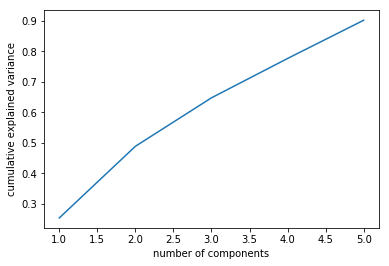

In [2]:
# visualize the relationship between cumulative variance explained and number of components
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.array(range(len(compressor.explained_variance_ratio_))) + 1, 
         np.cumsum(compressor.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show(); # top 5 components can already explained 90% of the original variance

## Supervised Methods

### LDA (Linear Discriminant Analysis)

Compared with PCA, LDA is a supervised technique attempts to find a feature subset to maximize class linear-separability, that is, the projected points of the observations with the same class label are as close as possible, while the distances between the centers of difference class labels are as large as possible. LDA can only be applied to classification problems. LDA assumes that classes are normally distributed and have the same covariance matrix.  
    
Math detail can be accessed at the [official website](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda) of sklearn. Traditionally, LDA will reduce dimension to (K-1) where K is the number of classes. But in sklearn, it allows further dimension by incorporating PCA into LDA.

In [3]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# classification example
# use iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
# use the first 100 observations as train_set
# the rest 50 observations as test_set
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]
test_y = y[100:,]

# we need to standardize the data because LDA assumes normal distribution
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(train_set) 
standardized_train = model.transform(train_set)
standardized_test = model.transform(test_set)

# start compressing
compressor = LDA(n_components=2) # set n_components=2
# n_components <= min(n_classes - 1, n_features)

compressor.fit(standardized_train, train_y) # fit on trainset
transformed_trainset = compressor.transform(standardized_train) # transform trainset, (100,2)
transformed_testset = compressor.transform(standardized_test) # transform test set
assert transformed_trainset.shape[1] == transformed_testset.shape[1] # same number of features

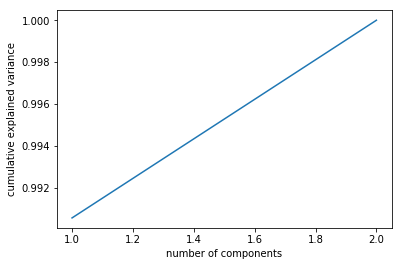

In [4]:
# visualize the relationship between cumulative variance explained and number of components
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.array(range(len(compressor.explained_variance_ratio_))) + 1, 
         np.cumsum(compressor.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();  # LDA compresses the original 4 variables into 2 
# These 2 variables can explain 100% of the variance